In [1]:
%load_ext autoreload
%autoreload 2

from data_helpers.tasak_reader import TasakReader



# Conllu tegemine

Features: https://github.com/estnltk/estnltk/blob/4236f2033110d2bf20fc7f565950c0a2170f8573/estnltk/estnltk/taggers/standard/syntax/visl_rows.ipynb#L39

In [2]:
!mkdir conll
!mkdir conll/tasak
!rm conll/tasak*.conll

mkdir: conll: File exists
mkdir: conll/tasak: File exists
zsh:1: no matches found: conll/tasak*.conll


In [3]:
%%time

file_name = 'data/tasak.vert'

my_nc21_reader = TasakReader(
   file_name = file_name
)

CPU times: user 75 µs, sys: 37 µs, total: 112 µs
Wall time: 115 µs


In [4]:
%%time
filename_template = './conll/tasak/tasak_%08d.conll'


doc = None
force_doc = False
file_nr = 1

f = open(filename_template % file_nr, 'w')
f.write('# global.columns = ID FORM LEMMA UPOS XPOS FEATS HEAD DEPREL DEPS MISC\n');

count_lines = 0
lines_per_file = 200000

for sentence_id, graph in my_nc21_reader.get_sentences():
    conllu_lines = []
    
    # print(sentence_id)
    #graph.draw_graph()
    
    sentence_text = ' '.join([graph.nodes[n]['form'] for n in sorted(graph.nodes) if n])
    
    if count_lines > lines_per_file:
        f.close()
        file_nr += 1
        f = open(filename_template % file_nr, 'w')
        f.write('# global.columns = ID FORM LEMMA UPOS XPOS FEATS HEAD DEPREL DEPS MISC\n');
        force_doc = True
        count_lines = 0
        
    
    
    if not doc == graph.get_metadata('doc') or force_doc:
        doc = graph.get_metadata('doc')
        conllu_lines.append(f'# newdoc = {doc}')
        force_doc = False
    
    # print(sentence_text)
    conllu_lines.append(f'# sent_id = {sentence_id}')
    conllu_lines.append(f'# text = {sentence_text}')
    for n in sorted(graph.nodes):
        # print(dict(graph.nodes[n]))
        if not n: 
            continue
        id = graph.nodes[n]['id']
        form = graph.nodes[n]['form']
        lemma = graph.nodes[n]['lemma']
        upos = graph.nodes[n]['pos']
        xpos = upos
        feats = []
        case = graph.get_node_case(n, False)
        inf_form = graph.get_node_inf_form(n)
        pronoun_type = graph.get_node_pronoun_type(n)
        adjective_type = graph.get_node_adjective_type(n)
        negation = graph.get_node_negation(n)
        inf_form = graph.get_node_inf_form(n)
        substantive_type = graph.get_node_substantive_type(n)
        numeral_type = graph.get_node_numeral_type(n)
        number_format = graph.get_node_number_format(n)
        adposition_type = graph.get_node_adposition_type(n)
        conjunction_type = graph.get_node_conjunction_type(n)
        punctuation_type = graph.get_node_punctuation_type(n)
        abbreviation_type = graph.get_node_abbreviation_type(n)
        capitalized = graph.get_node_capitalized(n)
        person = graph.get_node_person(n)
        tense = graph.get_node_tense(n)
        mood = graph.get_node_mood(n)
        voice = graph.get_node_voice(n)
        number = graph.get_node_number(n)
       
        if case:
            feats.append('Case=%s' % case)
        
        if inf_form:
            feats.append('VerbType=%s' % inf_form)
            
        if mood:
            feats.append('Mood=%s' % mood)
        
        if tense:
            feats.append('Tense=%s' % tense)
                
        if voice:
            feats.append('Voice=%s' % voice)
        
        if number:
            feats.append('Number=%s' % number)
        
        if negation:
            feats.append('Polarity=%s' % negation)
            
        if adposition_type:
            feats.append('AdpType=%s' % adposition_type)
          
        if person:
            feats.append('Person=%s' % person)
            
        if len(feats):
            feats = '|'.join(sorted(feats))
        else:
            feats = '_'
        
        head = graph.nodes[n]['head']
        deprel = graph.nodes[n]['deprel']
        deps = '_'
        if graph.nodes[n]['head']:
            deps = 'H_lemma:%s' % graph.nodes[int(graph.nodes[n]['head'])]['lemma'].replace('|','_')
        
        misc = '_'
        conllu_lines.append(f'{id}\t{form}\t{lemma}\t{upos}\t{xpos}\t{feats}\t{head}\t{deprel}\t{deps}\t{misc}')
    conllu_lines.append('')
    conllu_lines.append('')
    
    count_lines += len(conllu_lines) - 1   
    f.write('\n'.join(conllu_lines))

f.close()

data/tasak.vert


TSV lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20058039/20058039 [11:59<00:00, 27874.41it/s]

CPU times: user 11min 7s, sys: 13.7 s, total: 11min 21s
Wall time: 12min


In [5]:
graph.get_metadata('doc')

'file="tea_eesti_arst_2002.tasak.xml" type="ajakirjanumber" title="Nr 12 Detsember 2002" text_no="705035" subcorpus="tea">'

In [6]:
print('\n'.join(conllu_lines))

# sent_id = 18969731
# text = Ado Juhasoo 258 Adda Mardna 258 Laine Aas 323 Anu Aasmaa 697 Linda Abram 697 Uno Podar 846
1	Ado	Ado	S	S	Case=nom|Number=sg	0	root	_	_
2	Juhasoo	Juhasoo	S	S	Case=nom|Number=sg	1	flat	H_lemma:Ado	_
3	258	258	N	N	_	1	nummod	H_lemma:Ado	_
4	Adda	Adda	S	S	Case=nom|Number=sg	1	flat	H_lemma:Ado	_
5	Mardna	Mardna	S	S	Case=nom|Number=sg	4	flat	H_lemma:Adda	_
6	258	258	N	N	_	7	nummod	H_lemma:Laine	_
7	Laine	Laine	S	S	Case=nom|Number=sg	1	appos	H_lemma:Ado	_
8	Aas	Aas	S	S	Case=nom|Number=sg	7	flat	H_lemma:Laine	_
9	323	323	N	N	_	7	flat	H_lemma:Laine	_
10	Anu	Anu	S	S	Case=gen|Number=sg	7	flat	H_lemma:Laine	_
11	Aasmaa	aasmaa	S	S	Case=nom|Number=sg	7	flat	H_lemma:Laine	_
12	697	697	N	N	_	13	flat	H_lemma:Linda	_
13	Linda	Linda	S	S	Case=nom|Number=sg	7	flat	H_lemma:Laine	_
14	Abram	Abram	S	S	Case=nom|Number=sg	13	flat	H_lemma:Linda	_
15	697	697	N	N	_	13	flat	H_lemma:Linda	_
16	Uno	Uno	S	S	Case=nom|Number=sg	7	flat	H_lemma:Laine	_
17	Podar	Podar	S	S	Case=nom|Number=sg	16

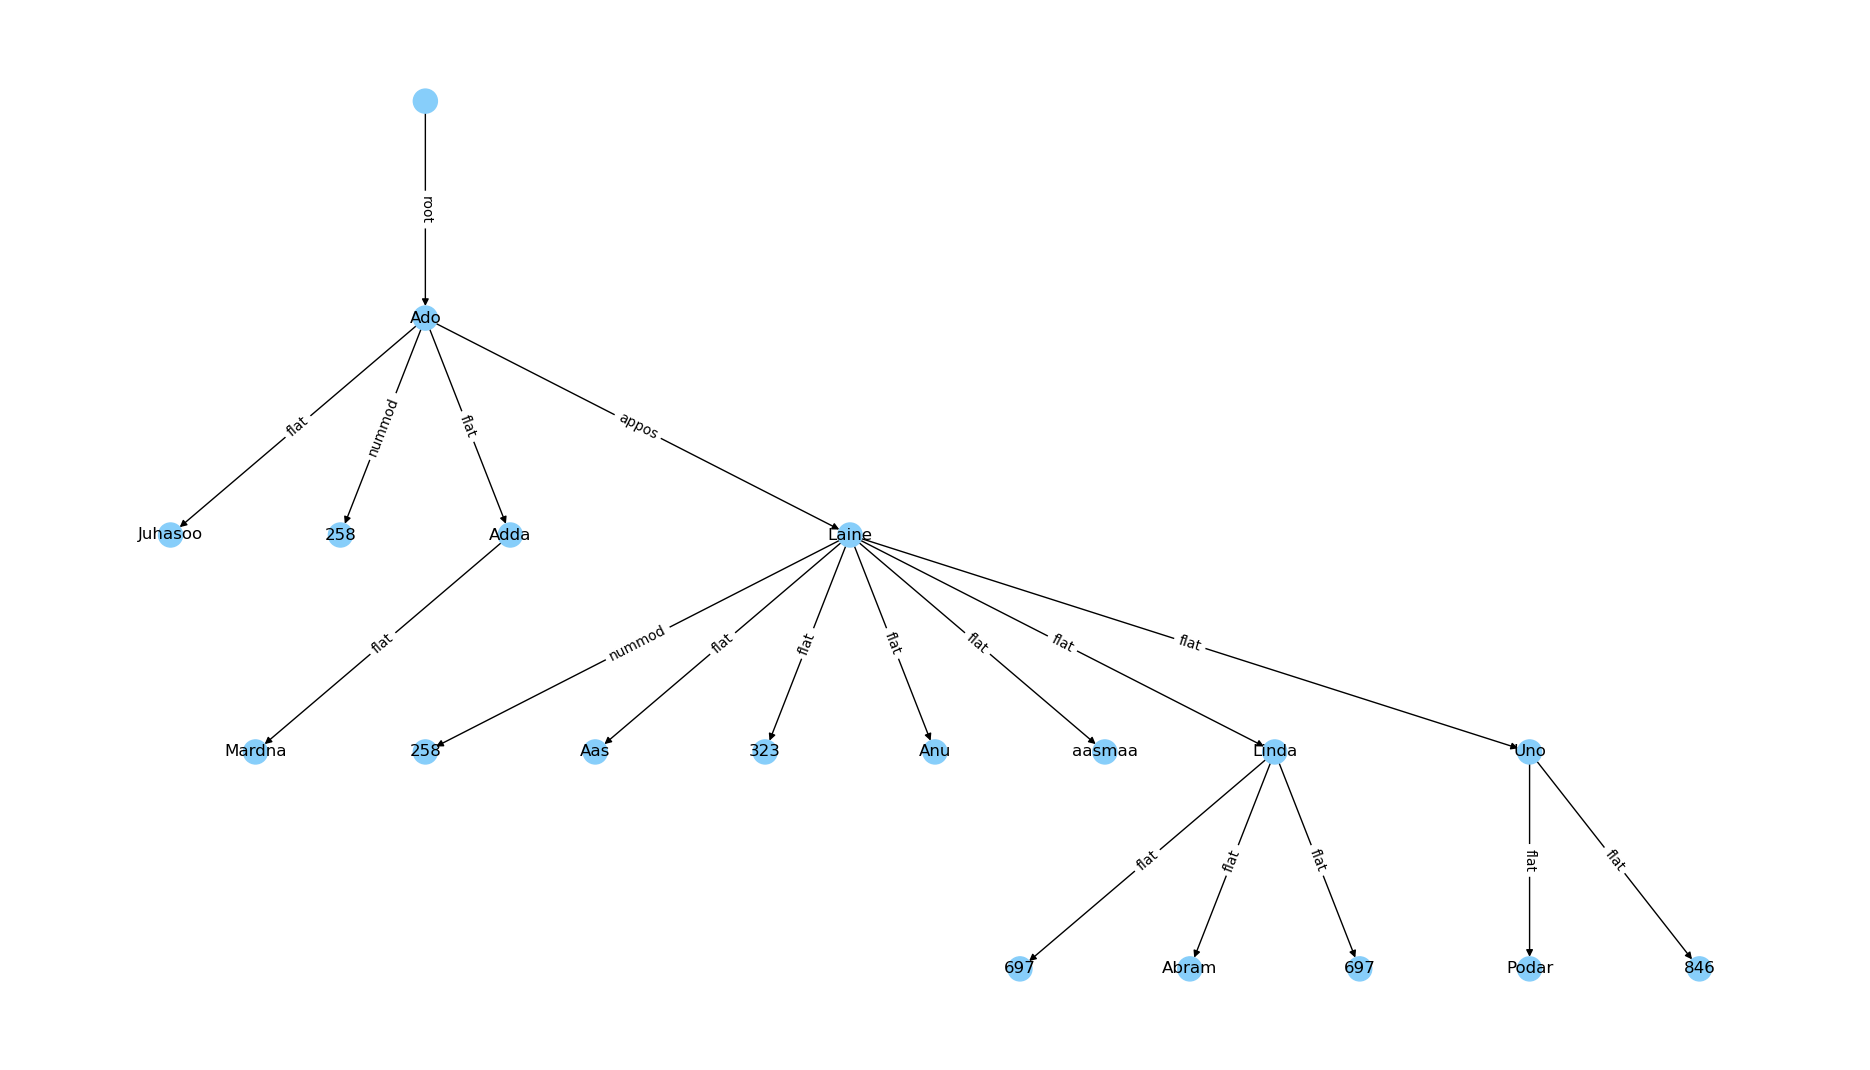

<Figure size 1850x1050 with 0 Axes>

In [7]:
graph.draw_graph()